#Resumen numerico de Variables Cualitativas 
La forma mas sencilla de  resumir las varibales cualitativas es hacer una tabla de contigencia que resuma las distribuciones de frecuencia. 

In [1]:
import numpy as np
import pandas as pd
data= pd.read_csv('/home/inma/Master_Data_Science _Contenido/Fundamentos_de_Analisis _de_Datos/Practica/Datos/Melbourne_housing_FULL.csv')

In [2]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
data.info() # amador post code cpmp varoable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Podemos observar que 8 de las variables  son cualitativas, pero añadiremos "Postcode" dentro del analisis de las variables cualitativas ya que apesar de estar compuesto por un valor numerico  son datos independientes que debe ser tratados como categirias. 


#Suburb 

Esta variable  hace referencia al barrio donde se encuentra la casa. Procedemos a hacer un analisis de la distribución de densidad y podemos concluir que hay 351 suburbios diferentes. 
 ( podemos agruparlos por zonas pero no tine sentido si hacemos referencia a la localizacion mejor que a esto)

In [4]:
Variables_cualitativas=data[["Suburb","Address","Type","Method","SellerG","Date","CouncilArea","Regionname","Postcode"]]
pd.value_counts(Variables_cualitativas['Suburb'])

Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
                 ... 
Hopetoun Park       1
Yarra Glen          1
viewbank            1
Eynesbury           1
Bulla               1
Name: Suburb, Length: 351, dtype: int64

#Address

La variable Address  indica la dirección donde se encuentran las casas. Al realizar el analisis  de distribución por densidad, podemos comprobar que hay direcciones repetidas, esto puede hacer referencia a la dirección de un edificio,  la venta de la misma casa en difrentes fechas o a duplicados. Para ello procedemos a analizar dichas categorias en profundidad. 

In [26]:
Address=pd.value_counts(Variables_cualitativas['Address'])
Address[Address!=1]


In [28]:
data_aux=data[data.Address == '118 Westgarth St']
print(data_aux)

          Suburb           Address  Rooms Type      Price Method SellerG  \
7454   Northcote  118 Westgarth St      3    h  1500000.0     PI  Jellis   
13335  Northcote  118 Westgarth St      4    h  1822000.0      S  Nelson   

            Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
7454  2016-07-30       5.5    3070.0  ...       1.0  8.0     727.0   
13335 2017-05-13       5.5    3070.0  ...       1.0  8.0     728.0   

       BuildingArea  YearBuilt           CouncilArea Lattitude  Longtitude  \
7454            NaN     1900.0  Darebin City Council  -37.7825    145.0072   
13335           NaN     1900.0  Darebin City Council  -37.7825    145.0072   

                  Regionname Propertycount  
7454   Northern Metropolitan       11364.0  
13335  Northern Metropolitan       11364.0  

[2 rows x 21 columns]


In [6]:
data[data.Address=="5 Charles St"]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.9944,Northern Metropolitan,4019.0
2289,Brunswick,5 Charles St,3,h,NaN,SP,Nelson,26/07/2016,5.2,3056.0,...,1.0,0.0,179.0,NaN,1900.0,Moreland City Council,-37.77450,144.9634,Northern Metropolitan,11918.0
4575,Glen Iris,5 Charles St,4,h,2010000.0,S,Marshall,10/12/2016,9.2,3146.0,...,2.0,2.0,659.0,212.0,1930.0,Boroondara City Council,-37.85090,145.0916,Southern Metropolitan,10412.0
9907,Sunshine North,5 Charles St,4,h,705000.0,S,Douglas,25/02/2017,13.3,3020.0,...,2.0,1.0,570.0,NaN,NaN,Brimbank City Council,-37.77490,144.8329,Western Metropolitan,4217.0
10018,Surrey Hills,5 Charles St,4,h,NaN,S,Jellis,3/12/2016,11.2,3127.0,...,2.0,2.0,349.0,NaN,NaN,Boroondara City Council,-37.82550,145.1116,Southern Metropolitan,5457.0
25584,Bentleigh East,5 Charles St,3,h,1700000.0,S,Buxton,28/10/2017,13.8,3165.0,...,1.0,2.0,649.0,NaN,NaN,Glen Eira City Council,-37.91725,145.0559,Southern Metropolitan,10969.0


In [33]:
data[data.Address=="118 Westgarth St"]
data_aux.keys()
data_aux["Bedroom2"]

7454     4.0
13335    4.0
Name: Bedroom2, dtype: float64

In [7]:
data[data.Address=="25 William St"]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2435,Bulleen,25 William St,4,h,1235000.0,S,Jellis,3/09/2016,11.8,3105.0,...,2.0,2.0,556.0,214.0,1957.0,Manningham City Council,-37.76570,145.09570,Eastern Metropolitan,4480.0
11315,Fawkner,25 William St,3,h,NaN,SN,Barry,28/05/2016,12.4,3060.0,...,1.0,1.0,583.0,122.0,1960.0,Hume City Council,-37.70430,144.96720,Northern Metropolitan,5070.0
21258,Hawthorn,25 William St,3,h,1450000.0,VB,Marshall,16/09/2017,5.3,3122.0,...,1.0,0.0,216.0,104.0,1890.0,Boroondara City Council,-37.82031,145.04043,Southern Metropolitan,11308.0
34242,Fawkner,25 William St,3,h,728000.0,S,Ray,24/02/2018,13.1,3060.0,...,1.0,4.0,584.0,122.0,1960.0,Hume City Council,-37.70428,144.96717,Northern Metropolitan,5070.0


In [8]:
data[data.Address=="28 Blair St"]#En este caso, las dos ultimas filas,  son un duplicado.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2178,Brunswick,28 Blair St,2,h,1100000.0,S,Nelson,10/09/2016,5.2,3056.0,...,1.0,0.0,153.0,NaN,1900.0,Moreland City Council,-37.7705,144.9647,Northern Metropolitan,11918.0
6606,Maribyrnong,28 Blair St,2,t,440000.0,PI,Rendina,22/08/2016,8.7,3032.0,...,1.0,2.0,54.0,85.0,2000.0,Maribyrnong City Council,-37.7740,144.8797,Western Metropolitan,4918.0
6610,Maribyrnong,28 Blair St,2,t,400000.0,PI,Rendina,24/09/2016,8.7,3032.0,...,1.0,2.0,54.0,85.0,2000.0,Maribyrnong City Council,-37.7740,144.8797,Western Metropolitan,4918.0


In [9]:
data[data.Address=="36 Aberfeldie St"]# en este caso tambien tenemos datos duplicados y efectivamente es una casa 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6920,Moonee Ponds,36 Aberfeldie St,3,h,1725000.0,PI,Nelson,24/09/2016,6.9,3039.0,...,2.0,3.0,596.0,203.0,1950.0,Moonee Valley City Council,-37.76090,144.90500,Western Metropolitan,6232.0
15145,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,3/06/2017,6.2,3039.0,...,2.0,2.0,596.0,203.0,1950.0,Moonee Valley City Council,-37.76086,144.90497,Western Metropolitan,6232.0
15799,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,17/06/2017,6.2,3039.0,...,2.0,2.0,596.0,203.0,1950.0,Moonee Valley City Council,-37.76086,144.90497,Western Metropolitan,6232.0


Al existir la sospecha de que algunos de los datos estan duplicados, procedemos a hacer una eliminacion de duplicados en nuestro data set por longitud, latitud , precio y numero de habitaciones. 

#PostCode

La variable Postcode, como comentamos anteriormente, se incluye dentro del analisis de las variables cualitativas. 

In [10]:
pd.value_counts(Variables_cualitativas['Postcode'])

3073.0    844
3046.0    638
3020.0    617
3121.0    612
3165.0    583
         ... 
3139.0      1
3159.0      1
3793.0      1
3788.0      1
3428.0      1
Name: Postcode, Length: 211, dtype: int64

##Variable "Type"

Esta variable cualitativa  es polítoma y presenta mas de dos valor no numéricos y corresponde con el tipo de vivienda. 
La descripción determinada por la base de datos es la siguiente: 
br - bedroom(s); 
h - house,cottage,villa, semi,terrace; 
u - unit, duplex;
t - townhouse; 
dev site - development site; 
o res - other residential

Sin embargo, procederemos al renombramiento de las categorias para su mejor comprensión. 

Dormitorio- bedroom(s); 
Casa - house,cottage,villa, semi,terrace; 
Piso  - unit, duplex;
Adosado- townhouse; 
dev site - development site; 
o res - other residential

In [56]:
data.apply(pd.Series.replace, to_replace='br', value='Dormitorio')# hacer una lista  para todos 
#Variables_cualitativas["Type"].replace({"br":"Dormitorio","h":"Casa","u":"Piso","t":"Adosado"}, inplace=True)
pd.value_counts(data['Type'])
100*Variables_cualitativas["Type"].value_counts() /len(Variables_cualitativas["Type"])


Casa       68.795364
Piso       20.934102
Adosado    10.270534
Name: Type, dtype: float64

In [61]:
data.apply(pd.Series.replace, to_replace='br', value='Dormitorio') #&(to_replace='h', value='Casa'))

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


Esto hace referencia a la cultura del pais, donde la mayoria de la viviendas son corresponden a edificios unifamiliares. #aqui podria poner  en comparacion con la regionname, para ver donde estan localizadas. 

##Variable "Method"

Esta variable cualitativa  es polítoma y presenta mas de dos valor no numéricos y corresponde a  tipo de venta por la que adquirio el precio que refleja el dataset de cada una de las propiedades. 
La descripción determinada por la base de datos es la siguiente: 
S - property sold( Vendida); 
SP - property sold prior(vendida anteriormente); 
PI - property passed in(propiedad traspasada); 
PN - sold prior not disclosed (Venta anterior no revelada); 
SN - sold not disclosed( Venta no revelada); 
NB - no bid ( Sin oferta); 
VB - vendor bid (oferta del vendedor); 
W - withdrawn prior to auction (Retirada antes de la subasta); 
SA - sold after auction( Vendida antes de la subasta); 
SS - sold after auction price not disclosed (Vendido despues de la subasta, precio no revelado). 
N/A - price or highest bid not available(Precio u oferta mas alta no disponible).



In [12]:
pd.value_counts(Variables_cualitativas['Method'])
100*Variables_cualitativas["Method"].value_counts() /len(Variables_cualitativas["Method"])
#agrupar??

S     56.642855
SP    14.616863
PI    13.913991
VB     8.916430
SN     3.778294
PN     0.883610
SA     0.648363
W      0.496314
SS     0.103279
Name: Method, dtype: float64

Analizamos la relacion entre las variables que indican falta de precio  y la columna " Price" para comprobar la relacion con de estas categorias y los datos faltantes en precio. 

PN - sold prior not disclosed (Venta anterior no revelada); 
SN - sold not disclosed( Venta no revelada); 
NB - no bid ( Sin oferta); 
SS - sold after auction price not disclosed (Vendido despues de la subasta, precio no revelado). 
N/A - price or highest bid not available(Precio u oferta mas alta no disponible).


In [55]:
Price_Method=data[["Price", "Method"]]
Price_Method=data[(data.Method=="PN")|(data.Method=="SN")|(data.Method=="NB")|(data.Method=="SS")|(data.Method=="N/A")]
#pd.crosstab(index=Price_Method["Price"],columns=Price_Method["Method"],margins=True)
print(Price_Method["Price"])
pd.value_counts(Price_Method['Price'])



0       NaN
7       NaN
139     NaN
150     NaN
169     NaN
         ..
34765   NaN
34779   NaN
34795   NaN
34812   NaN
34834   NaN
Name: Price, Length: 1661, dtype: float64


Series([], Name: Price, dtype: int64)

Con este analisis podemos  observar que los datos faltantes corresponden con las categorias  mencionadas anteriormente. 
Esto es interesante tenerlo en cuenta para el tratamiento de missings


##Variable "SellerG"


La variable SellerG indica la fecha de venta o de recogida del precio de dicho apartamento. En este caso podemos ver que la fechas se encuentran entre Enero de 2016 y Octubre de 2018.


pd.value_counts(Variables_cualitativas['SellerG'])

In [14]:
# convertimos el campo fecha  datetime de pandas
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])
print('La fecha mínima del data set es',data['Date'].min())
print('La fecha máxima del data set es',data['Date'].max())
pd.value_counts(Variables_cualitativas['Date'])

La fecha mínima del data set es 2016-01-28 00:00:00
La fecha máxima del data set es 2018-10-03 00:00:00


28/10/2017    1119
17/03/2018     970
24/02/2018     941
9/12/2017      927
25/11/2017     902
              ... 
4/02/2016       44
30/09/2017      22
20/01/2018      19
27/01/2018      12
28/01/2016       3
Name: Date, Length: 78, dtype: int64

##Variable "CouncilArea'"


La variabe Counsil Area corresponde con al area municipal donde se encuentran cada una de las casas. Esta variable aporta una informacion parecida a la que aporta postcode o regionname, por lo tanto podria ser considerada una de las variables a descartar. 

In [16]:
pd.value_counts(Variables_cualitativas['CouncilArea'])

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

##Variable "Regionname"


Corresponde a la regiones de Melburne, principalmente  podemos obsevar que la mayoria de las viviendas se encuentran alrededor de la zona metropolitana, que tiene relacion con las zonas con mayor densidad de poblacion. 

In [15]:
pd.value_counts(Variables_cualitativas['Regionname'])
100*Variables_cualitativas["Regionname"].value_counts() /len(Variables_cualitativas["Regionname"])

Southern Metropolitan         33.955877
Northern Metropolitan         27.417735
Western Metropolitan          19.505408
Eastern Metropolitan          12.557019
South-Eastern Metropolitan     4.988955
Eastern Victoria               0.654101
Northern Victoria              0.582379
Western Victoria               0.329919
Name: Regionname, dtype: float64

Por otro lado, una vez analizado cada una de las variables podemos ver que es interesante  observar la relacion entre algunas de las variables. 
Por ejemplo haciendo una relacion entre el tipo de casa y al region en la que se encuentra. 

In [24]:
pd.crosstab(index=Variables_cualitativas["Type"],columns=Variables_cualitativas["Regionname"],margins=True)#representacion de la distribucion de tipo de casas por region 

Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,All
Type,,,,,,,,,
Adosado,391,5,1035,1,162,1332,654,0,3580
Casa,3438,216,6489,199,1356,6968,5199,113,23978
Piso,548,7,2033,3,221,3536,946,2,7296
All,4377,228,9557,203,1739,11836,6799,115,34854


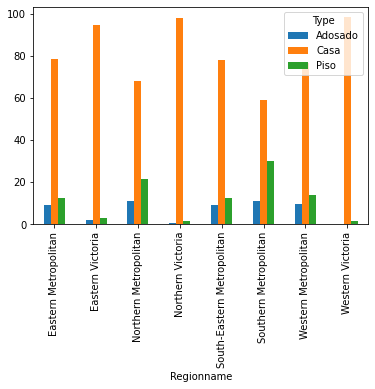

In [25]:
plot = pd.crosstab(index=Variables_cualitativas['Regionname'],
            columns=Variables_cualitativas['Type']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

En el grafico anterior observamos que  casi todos los tipos de casas que corresponden con piso en encuentran en las zonas centrales de la ciudad.

In [17]:
pd.crosstab(index=data["Regionname"],columns=data["Method"],margins=True)# ver tiene setido comprarlas variables.  hacer graficas por variable
#Mirar como son los barrios caros,etc. 
# ver las proporciones de ventas entre  S y SA ( por ejemplo) en diferenctre regiones. 

Method,PI,PN,S,SA,SN,SP,SS,VB,W,All
Regionname,,,,,,,,,,
Eastern Metropolitan,677,53,2338,39,291,544,13,408,14,4377
Eastern Victoria,30,6,99,6,9,49,1,23,5,228
Northern Metropolitan,1271,47,5695,46,304,1444,5,703,42,9557
Northern Victoria,15,1,110,2,10,46,2,14,3,203
South-Eastern Metropolitan,263,20,980,16,75,261,3,99,22,1739
Southern Metropolitan,1676,114,6699,81,438,1421,10,1369,28,11836
Western Metropolitan,907,61,3753,36,188,1308,2,487,57,6799
Western Victoria,11,6,69,0,2,21,0,4,2,115
All,4850,308,19743,226,1317,5094,36,3107,173,34854
